In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c song-popularity-prediction
! unzip  song-popularity-prediction


  0% 0.00/4.18M [00:00<?, ?B/s]
100% 4.18M/4.18M [00:00<00:00, 53.5MB/s]
Archive:  song-popularity-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
data=pd.read_csv("/content/train.csv")
data.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,40000.00000,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,11547.14972,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,0.00000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9999.75000,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,19999.50000,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,29999.25000,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,39999.00000,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


## Imputing missing values

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data)
data = imputer.transform(data)

columns=['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence','song_popularity']
data=pd.DataFrame(data,columns=columns)
data

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0.0,212990.000000,0.642286,0.856520,0.707073,0.002001,10.0,0.198514,-5.619088,0.0,0.082570,158.386236,4.0,0.734642,0.0
1,1.0,193165.847572,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1.0,0.127358,102.752988,3.0,0.711531,1.0
2,2.0,193213.000000,0.276404,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0.0,0.052282,178.685791,3.0,0.425536,0.0
3,3.0,249893.000000,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0.0,0.035618,128.715630,3.0,0.453597,0.0
4,4.0,165969.000000,0.493017,0.570951,0.740982,0.002033,10.0,0.094891,-2.684095,0.0,0.050746,121.928157,4.0,0.741311,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995.0,237799.000000,0.276404,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0.0,0.078060,168.262924,3.0,0.178159,0.0
39996,39996.0,191119.000000,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0.0,0.188607,110.684544,3.0,0.790626,0.0
39997,39997.0,160879.000000,0.877431,0.409065,0.292671,0.036527,10.0,0.110664,-15.378585,0.0,0.031294,99.556074,3.0,0.177947,1.0
39998,39998.0,193918.000000,0.276404,0.365738,0.683932,0.000339,1.0,0.356308,-4.661977,1.0,0.054096,139.857384,3.0,0.772978,0.0


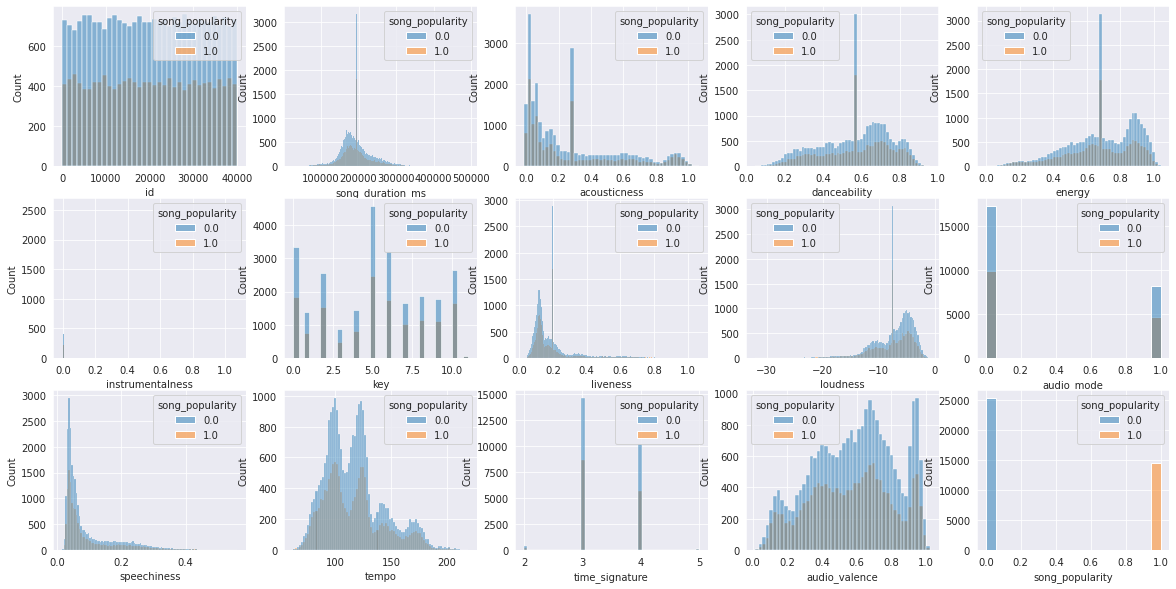

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
columns=data.columns
for col, ax in zip(columns, axs.flat):
    sns.histplot(data=data,hue='song_popularity',
                 x=col,
                 ax=ax)

## Data transformation

In [6]:
#normalisation included
'''def trans(X):
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer = imputer.fit(X)
  X = imputer.transform(X)

  columns=['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
        'speechiness', 'tempo', 'time_signature', 'audio_valence','song_popularity']
  X=pd.DataFrame(X,columns=columns)
  
  df['acousticness']=(1+X['acousticness'])**0.5
  df['liveness']=X['liveness']**0.3
  a='speechiness'
  df[a]=np.log(1+X[a])**0.3
  X['loudness']=10**(X['loudness']/10)

  encoder = OneHotEncoder(handle_unknown='ignore')
  encoder_X = pd.DataFrame(encoder.fit_transform(X[['key','time_signature']]).toarray())
  X=X.join(encoder_X)
  X.drop(['key','time_signature'],axis=1,inplace=True)

  x =X.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  X_scaled = pd.DataFrame(x_scaled)
  return X_scaled'''

"def trans(X):\n  from sklearn.impute import SimpleImputer\n  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')\n  imputer = imputer.fit(X)\n  X = imputer.transform(X)\n\n  columns=['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',\n        'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',\n        'speechiness', 'tempo', 'time_signature', 'audio_valence','song_popularity']\n  X=pd.DataFrame(X,columns=columns)\n  \n  df['acousticness']=(1+X['acousticness'])**0.5\n  df['liveness']=X['liveness']**0.3\n  a='speechiness'\n  df[a]=np.log(1+X[a])**0.3\n  X['loudness']=10**(X['loudness']/10)\n\n  encoder = OneHotEncoder(handle_unknown='ignore')\n  encoder_X = pd.DataFrame(encoder.fit_transform(X[['key','time_signature']]).toarray())\n  X=X.join(encoder_X)\n  X.drop(['key','time_signature'],axis=1,inplace=True)\n\n  x =X.values #returns a numpy array\n  min_max_scaler = preprocessing.MinMaxScaler()\n  x_scaled = min_max_scaler.fit_transform(x)\n  

In [7]:
def trans(X):
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer = imputer.fit(X)
  X = imputer.transform(X)

  columns=['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
        'speechiness', 'tempo', 'time_signature', 'audio_valence']
  X=pd.DataFrame(X,columns=columns)
  
  

  encoder = OneHotEncoder(handle_unknown='ignore')
  encoder_X = pd.DataFrame(encoder.fit_transform(X[['key','time_signature']]).toarray())
  X=X.join(encoder_X)
  X.drop(['key','time_signature'],axis=1,inplace=True)

  x =X.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  X_scaled = pd.DataFrame(x_scaled)
  return X_scaled

In [8]:
y=data.pop('song_popularity')
data=trans(data)

##Splitting dataset for training and testing

In [9]:
X=data.copy()


from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


## Ada boost classifier

In [10]:
#adaboost
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier()
columns=X.columns
#adb_model = adb.fit(train_X,train_y)
#adb_model.score(val_X,val_y)#=0.6342

cx=train_X
cy=train_y
adb_model.fit(cx,cy)
preds = adb_model.predict(val_X)
print(mean_absolute_error(val_y, preds))

0.3667


In [11]:
mae1=mean_absolute_error(val_y, preds)

##  Random forest classifier

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [13]:
pipeline=make_pipeline(StandardScaler(),RandomForestClassifier(max_depth=12,max_features=3))

In [14]:
pipeline.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=12, max_features=3))])

In [15]:
result=pipeline.predict(val_X)

In [16]:
mean_absolute_error(result,val_y)

0.3625

In [17]:
mae2=mean_absolute_error(result,val_y)

##Gridsearch cv 

In [18]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics



rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,10))}]

clf = GridSearchCV(rfc, forest_params, cv = 5, scoring='accuracy')

clf.fit(train_X, train_y)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 12, 'max_features': 5}
0.6362333333333333


In [19]:
pred=clf.predict(val_X)
mae3=mean_absolute_error(val_y,pred)

{'max_depth': 12, 'max_features': 6}
0.6364333333333334

In [20]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)


my_ensemble = AdaBoostClassifier(base_estimator=DTC)



forest_params = [{'base_estimator__max_depth': list(range(10, 15)), 'n_estimators': list(range(50,100,10)), 'learning_rate':[.003,.01,.1,.5,.9]}]

clf2 = GridSearchCV(my_ensemble, forest_params, cv = 5, scoring='accuracy',n_jobs=2)

clf2.fit(train_X, train_y)

print(clf2.best_params_)

print(clf2.best_score_)

{'base_estimator__max_depth': 14, 'learning_rate': 0.01, 'n_estimators': 90}
0.6192333333333333


In [ ]:
pred=clf2.predict(val_X)
mae4=mean_absolute_error(val_y,pred)

**{'base_estimator__max_depth': 14, 'learning_rate': 0.7, 'n_estimators': 80}
0.5777333333333333**

In [ ]:
print(clf.best_estimator_)
print(clf.best_params_)


In [23]:
print(clf.best_estimator_.feature_importances_)

[0.07769129 0.07818637 0.08484609 0.07991017 0.08814832 0.08415243
 0.08652026 0.07583036 0.0097844  0.08791536 0.08455205 0.08301491
 0.00581775 0.00460126 0.00513868 0.00336765 0.0038524  0.0042352
 0.00550423 0.00574487 0.00542588 0.00572526 0.00650104 0.00514014
 0.00079804 0.00200645 0.00762081 0.0066518  0.00131653]


In [24]:
print(clf2.best_estimator_.feature_importances_)

[0.07961646 0.07827535 0.08608493 0.07921401 0.08053864 0.09270028
 0.07874901 0.08088427 0.00944109 0.08135315 0.0928049  0.08066423
 0.00592626 0.00427727 0.00561501 0.00348076 0.00430625 0.00455704
 0.00546333 0.00500752 0.00457177 0.00874399 0.00448517 0.00561269
 0.00054416 0.00143266 0.00738927 0.00746356 0.00079698]


In [25]:
l=[]
for x in train_X.columns:
  l.append(str(x))


<BarContainer object of 29 artists>

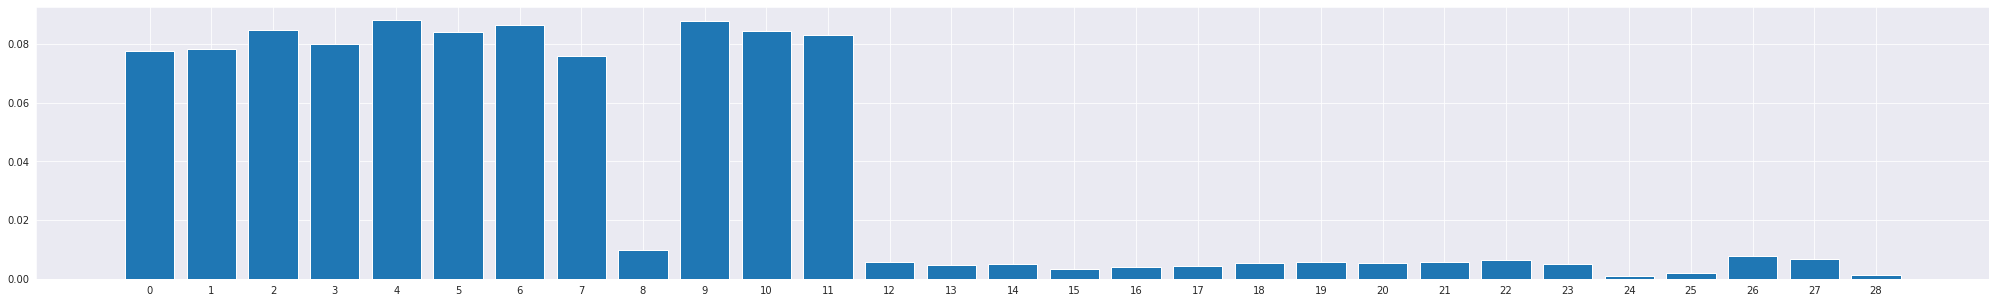

In [26]:
fig = plt.figure(figsize = (35, 5))
plt.bar(l,clf.best_estimator_.feature_importances_)

<BarContainer object of 29 artists>

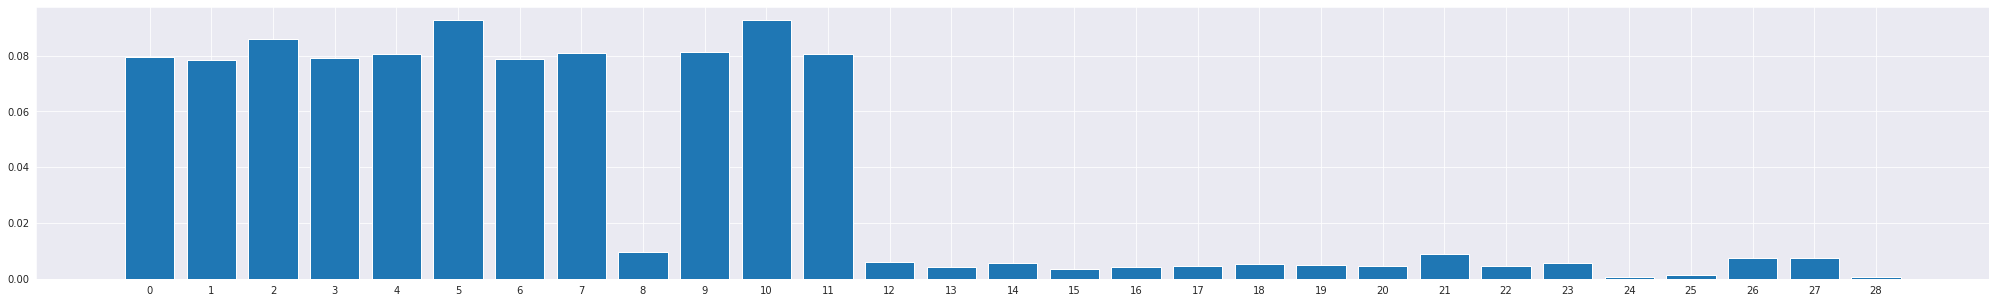

In [27]:
fig = plt.figure(figsize = (35, 5))
plt.bar(l,clf2.best_estimator_.feature_importances_)

In [28]:
error=[mae1,mae2,mae3,mae1]
model_name=['Ada boost classifier '+str(mae1),'baseline Random forest classifier '+str(mae2),'Random forest classifier '+str(mae3),'DecisionTreeClassifier '+str(mae4)]

<BarContainer object of 4 artists>

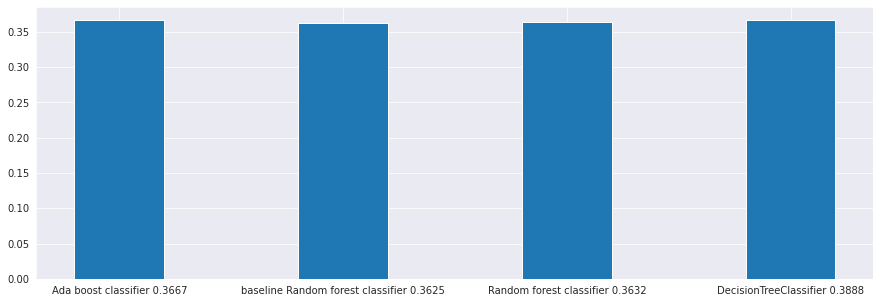

In [29]:
fig = plt.figure(figsize = (15, 5))
plt.bar(model_name,error,width=0.4)

In [30]:
test_data=pd.read_csv("/content/test.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(test_data)
test_data = imputer.transform(test_data)
test_data=trans(test_data)

In [31]:
prediction=clf2.predict(test_data)